In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [47]:
X = load_boston().data
Y = load_boston().target
type(X)

numpy.ndarray

In [0]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [49]:
clf = SGDRegressor()
clf.fit(X, Y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [0]:
import numpy as np
import pdb

def SGD(x, y ,alpha = 2):
    m = y.size  # number of training examples
    vector_size = x.shape[1]
    theta_before = np.zeros(vector_size)
    theta = np.random.rand(vector_size)
    b = np.random.rand()
    derivative = np.zeros(vector_size)
    b_deriv = 0
    no_iter = 0
    while True :
        no_iter = no_iter + 1
        k =  np.random.randint(0,100) #number of raws
        raw_index = np.random.randint(0,m,k)
        x_ = x[raw_index,:] #Taking k raws randomly
        y_ = y[raw_index]
        #pdb.set_trace()
        i = 0
        for row in x_:
            #derivative = derivative + np.dot(-2 * row, y_[i] - np.dot(row.T, theta)) # calculating darivative fro theta
            derivative = derivative + (-2 * row)*(y_[i] - np.dot(row.T, theta)) # calculating darivative fro theta
            b_deriv = b_deriv + -2 * (y_[i] - (np.dot(x_[i], theta) + b)) #calculating darivative for b
            i = i + 1
        theta = theta - alpha  * (derivative/float(m)) # Calculating steps
        b = b - alpha * (b_deriv/float(m))
        if (abs(np.linalg.norm(theta_before-theta)) < 0.00001): #stops when difference is about to zero
            break
        theta_before = theta
        alpha = alpha/2
    return (theta,b,no_iter)

In [0]:
def SGD_predict(x,w,b):
  y = []
  for row in x:
    y.append((np.dot(w,row)+b))
  return y

In [0]:
w,b,no_iter = SGD(X,Y)
pred_y = SGD_predict(X,w,b)

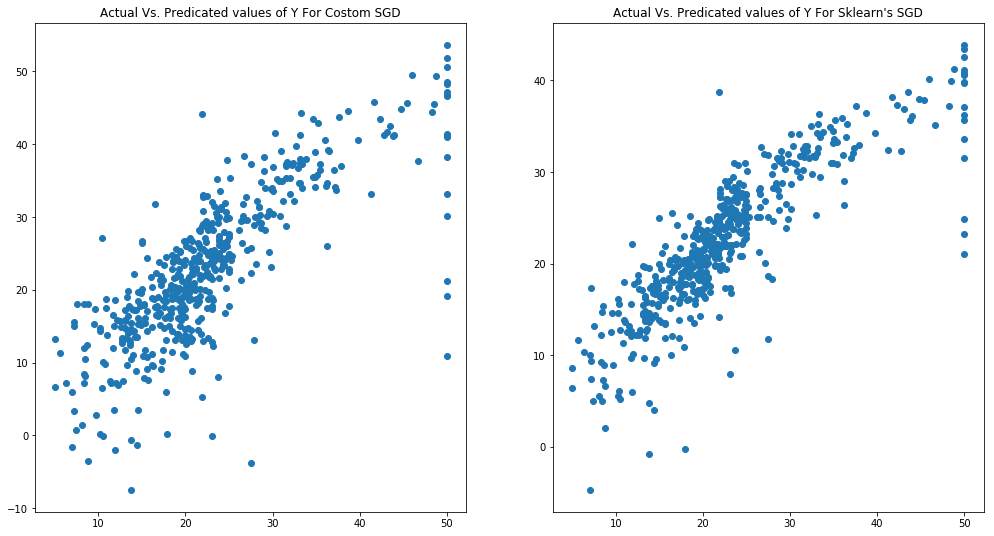

In [53]:
fig = plt.figure(1,figsize = (17,9))
fig1 = fig.add_subplot(121).set_title('Actual Vs. Predicated values of Y For Costom SGD')
fig2 = fig.add_subplot(122).set_title('Actual Vs. Predicated values of Y For Sklearn\'s SGD')


plt.subplot(121)
plt.scatter(Y,pred_y)

                                      
plt.subplot(122)
plt.scatter(Y,clf.predict(X))
                                     

In [54]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Type","W", "b","MSE", "No of Iterations"]

x.add_row(["SKlearn",clf.coef_,clf.intercept_,mean_squared_error(Y, clf.predict(X)),clf.n_iter_])
x.add_row(["Costom",w,b,mean_squared_error(Y,pred_y),no_iter])


print(x)

+---------+--------------------------------------------------------------------------+-------------------+-------------------+------------------+
|   Type  |                                    W                                     |         b         |        MSE        | No of Iterations |
+---------+--------------------------------------------------------------------------+-------------------+-------------------+------------------+
| SKlearn | [-0.73302656  0.57487505 -0.52171779  0.81345121 -1.01735663  3.09485758 |   [22.33926233]   | 22.83070152994931 |        5         |
|         |  -0.06619209 -2.04609693  0.82719947 -0.45336595 -1.82579611  0.89167409 |                   |                   |                  |
|         |                               -3.51245393]                               |                   |                   |                  |
|  Costom | [ 0.61877059 -0.00936073 -1.86226316  1.43113699 -2.11841435  5.64624767 | 22.83518487279299 | 39.25087753409695